In [12]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [13]:
df = pd.read_csv('/kaggle/input/titanic/train.csv')

### Visualization

In [14]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
df.loc[df['Sex'] == 'male', 'Sex'] = 0
df.loc[df['Sex'] == 'female', 'Sex'] = 1
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [18]:
#setdata = set(df['Name'].values.tolist())
#print(setdata)

In [19]:
df['Age'] = df['Age'].fillna(df['Age'].notnull().mean())
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [20]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

scale = df[['Sex','Age','Survived']].to_numpy()
print(scale.shape)

In [21]:
titles = set()
for names in df['Name']:
    titles.add(names.split(",")[1].split(".")[0].strip(" "))
print(titles)

{'Miss', 'Mr', 'Mme', 'Dr', 'Mrs', 'Ms', 'Col', 'Rev', 'Don', 'Sir', 'Mlle', 'Capt', 'Lady', 'the Countess', 'Jonkheer', 'Master', 'Major'}


In [22]:
Map = {'Mrs': 1, 'Miss': 2, 'Major': 3, 'Lady': 4, 'Sir': 5, 'Ms': 6, 'Mr': 7, 'Mlle': 8, 'Don': 9, 'Mme': 10, 'Capt': 11, 'Master': 12, 'the Countess': 13, 'Jonkheer': 14, 'Col': 15, 'Rev': 16, 'Dr': 17}
def func(row):
    row['Name'] = row['Name'].split(",")[1].split(".")[0].strip(" ")
    return Map.get(row['Name'])
df.loc[df['Embarked'] == 'C', 'Embarked'] = 0
df.loc[df['Embarked'] == 'Q', 'Embarked'] = 1
df.loc[df['Embarked'] == 'S', 'Embarked'] = 2
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].notnull().mean())
df['Title'] = df.apply(func,axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,2.0,7
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,0.0,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2.0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,2.0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,2.0,7


In [23]:
scale = df[['PassengerId','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Title','Survived']].to_numpy()
print(scale.shape)

(891, 10)


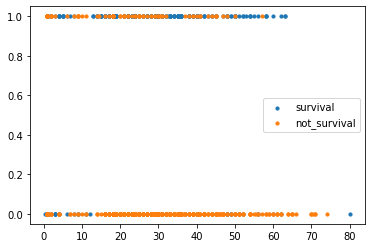

In [24]:
import matplotlib.pyplot as plt
df = df[['Age','Sex','Survived']]
X = df.iloc[:, :-1]

y = df.iloc[:, -1]

# filter out the applicants that got admitted
survival = df.loc[y == 1]
survival.head()

# filter out the applicants that din't get admission
not_survival = df.loc[y == 0]

# plots
plt.scatter(survival.iloc[:, 0], survival.iloc[:, 1], s=10, label='survival')
plt.scatter(not_survival.iloc[:, 0], not_survival.iloc[:, 1], s=10, label='not_survival')
plt.legend()
plt.show()

### Scale Data

In [25]:
t = int(0.8 * scale.shape[0])
train = scale[:t]
test = scale[t:]
print(train.shape, test.shape)

(712, 10) (179, 10)


In [26]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(train[:,:-1])
X_test = min_max_scaler.transform(test[:,:-1])
print(X_train.shape, X_test.shape)

(712, 9) (179, 9)


In [27]:
y_train = train[:,-1]
y_test = test[:,-1]
X_train = X_train
y_train = y_train.astype('int')
X_test = X_test
y_test = y_test.astype('int')

In [28]:
print(X_train)

[[0.         1.         0.         ... 0.01415106 1.         0.375     ]
 [0.00140647 0.         1.         ... 0.13913574 0.         0.        ]
 [0.00281294 1.         1.         ... 0.01546857 1.         0.0625    ]
 ...
 [0.99718706 1.         0.         ... 0.02975782 0.         0.6875    ]
 [0.99859353 0.         1.         ... 0.09662576 0.         0.4375    ]
 [1.         0.         0.         ... 0.05182215 1.         0.375     ]]


### Training

In [29]:
%time
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)


CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.63 µs


LogisticRegression(random_state=0)

### Predict

In [30]:
model.predict(X_test)

array([0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0])

### Accuracy

In [31]:
print("Train set: ", model.score(X_train, y_train))
print("Test set: ", model.score(X_test, y_test))

Train set:  0.7921348314606742
Test set:  0.8156424581005587


### Accuracy with Age, Sex: 
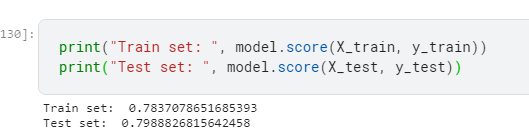
### Accuracy with PassengerId, Pclass, Sex, Age, Fare:
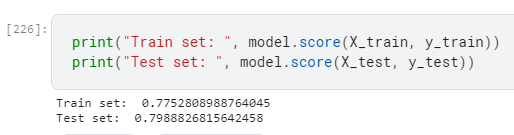

### Submit

In [32]:
csv = pd.read_csv('/kaggle/input/titanic/test.csv')

In [33]:
csv.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [34]:
csv.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [35]:
csv.loc[csv['Sex'] == 'male', 'Sex'] = 0
csv.loc[csv['Sex'] == 'female', 'Sex'] = 1
csv['Age'] = csv['Age'].fillna(csv['Age'].notnull().mean())
csv['Fare'] = csv['Fare'].fillna(csv['Fare'].notnull().mean())
Map = {'Mrs': 1, 'Miss': 2, 'Major': 3, 'Lady': 4, 'Sir': 5, 'Ms': 6, 'Mr': 7, 'Mlle': 8, 'Don': 9, 'Mme': 10, 'Capt': 11, 'Master': 12, 'the Countess': 13, 'Jonkheer': 14, 'Col': 15, 'Rev': 16, 'Dr': 17}
def func(row):
    row['Name'] = row['Name'].split(",")[1].split(".")[0].strip(" ")
    return Map.get(row['Name'])
csv.loc[csv['Embarked'] == 'C', 'Embarked'] = 0
csv.loc[csv['Embarked'] == 'Q', 'Embarked'] = 1
csv.loc[csv['Embarked'] == 'S', 'Embarked'] = 2
csv['Embarked'] = csv['Embarked'].fillna(csv['Embarked'].notnull().mean())
csv['Title'] = csv.apply(func,axis=1)
csv['Title'] = csv['Title'].fillna(csv['Title'].notnull().mean())
df.head()
X_test = min_max_scaler.transform(csv[['PassengerId','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Title']].to_numpy())

In [36]:
csv.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Title            0
dtype: int64

In [37]:
print(np.any(np.isnan(X_test)), np.all(np.isfinite(X_test)))

False True


In [38]:
np.argwhere(np.isnan(X_test))

array([], shape=(0, 2), dtype=int64)

In [39]:
y_pred = model.predict(X_test)
print(y_pred)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0
 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 1 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [40]:
output = pd.DataFrame({'PassengerId': csv.PassengerId, 'Survived': y_pred.astype(int)})
output.to_csv('submission.csv', index=False)